<a href="https://colab.research.google.com/github/My1nonly/PCVK_smt6_2023/blob/main/week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


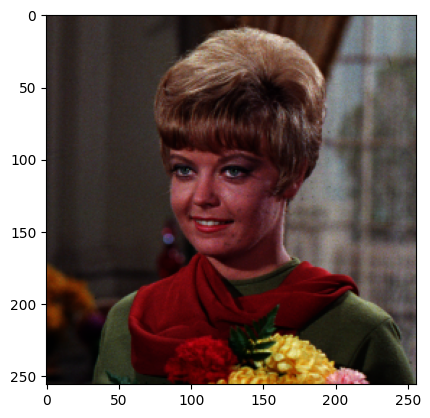

In [3]:
img = cv.imread('/content/drive/MyDrive/images/female.tiff')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

Gamma correction on images
-----------------------------------
Enter Gamma Value: 3


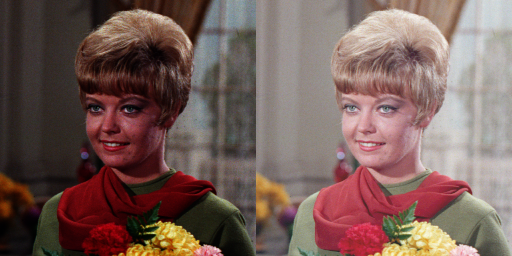

In [4]:
#Gamma Correction
print('Gamma correction on images')
print('-----------------------------------')
try:
  gamma = int(input('Enter Gamma Value: '))
except ValueError:
    print('Error, not a number')

original = cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for x in range(original.shape[0]):
  for y in range(original.shape[1]):
    for z in range(original.shape[2]):
      gamma_image[x,y,z] = np.clip(255 * pow(original[x,y,z] / 255, (1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)


Image depth simulation
-------------------------------
Enter Bit Depth Value: 2


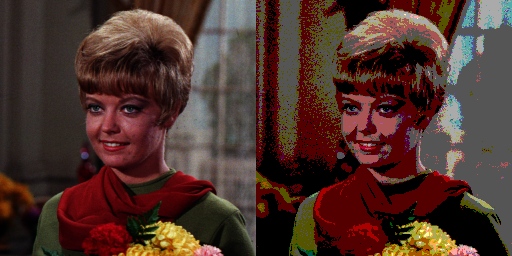

In [5]:
# Create Image Depth Simulation
original = cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print('Image depth simulation')
print('-------------------------------')
try:
  bd = float(input('Enter Bit Depth Value: '))
except ValueError:
  print('Error, not a number')

level = 255 / (pow(2, bd) -1)

for x in range(original.shape[0]):
  for y in range(original.shape[1]):
    for z in range(original.shape[2]):
      gamma_image[x,y,z] = np.clip(round(original[x,y,z] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)
